In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
df = pd.read_excel("Results.xlsx", header=None)
df = df.loc[1:,list(range(11))].set_index(0).T
df.head()

,demog1,demog2,demog3,demog4,demog5,demog6,demog7,demog8,manual_needle1,manual_needle2,...,forceps2,forceps3,forceps_feedback1,forceps_feedback2,forceps_feedback3,forceps_feedback4.1,forceps_feedback4.2,forceps_feedback4.3,changing _instrument,forceps_xbox
1,M,23,Y,Y,2,N,N,N,4,3,...,1,3,2,1,4,5,5,5,2,4
2,M,23,Y,Y,4,Y,N,N,4,3,...,4,3,3,2,3,3,5,5,1,4
3,M,31,Y,Y,1,N,N,N,2,3,...,1,2,1,1,5,5,5,5,1,5
4,M,36,Y,Y,4,N,N,N,3,4,...,2,2,2,3,3,4,4,4,3,2
5,M,27,Y,N,4,N,N,N,3,4,...,1,2,2,1,5,5,5,5,1,5


In [4]:
def plot_question(df, variable, title, categories):
    df = df.copy()
    
    value_map = {i: v for i, v in enumerate(categories, 1)}
    df[variable] = pd.Categorical(df[variable].map(value_map), categories)
    by_change = df.groupby(variable)[["demog1"]].count().reset_index().rename(columns={"demog1": "count"})
    
    plt.bar(by_change[variable], by_change["count"])
    plt.yticks(range(by_change["count"].max()+ 1))
    # plt.xticks(categories)
    plt.ylabel("N. Participants")
    plt.title(title)
    plt.show()

In [5]:
def plot_two_questions(df, first_variable, first_name, second_variable, second_name, categories, title):

    value_map = {i: v for i, v in enumerate(categories, 1)}
    data = df.copy()
    
    by_change = None
    for col, new_name in ((first_variable, first_name), (second_variable, second_name)):
        data[col] = pd.Categorical(data[col].map(value_map), categories)
        this_df = data.groupby(col)[["demog1"]].count().rename(columns={"demog1": new_name})
        if by_change is None:
            by_change = this_df
            by_change.index.name = "response"
        else:
            by_change[new_name] = this_df[new_name]
    
    by_change = by_change.reset_index().melt(id_vars="response", value_vars=[first_name, second_name], var_name="experiment")
    
    sns.barplot(by_change, x="response", y="value", hue="experiment")
    plt.legend()
    plt.title(title)
    plt.ylabel("N. Participants")
    plt.xlabel("")
    plt.show()

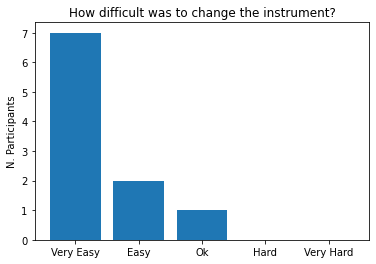

In [6]:
categories = ["Very Easy", "Easy", "Ok", "Hard", "Very Hard"]
plot_question(df, variable="changing _instrument", title="How difficult was to change the instrument?", categories = categories)

In [7]:
    
plot_question(df, variable = "manual_needle1", title = "Physical effort")

TypeError: plot_question() missing 1 required positional argument: 'categories'

In [ ]:
plot_question(df, variable = "needle1", title = "Physical effort")

In [ ]:
by_change

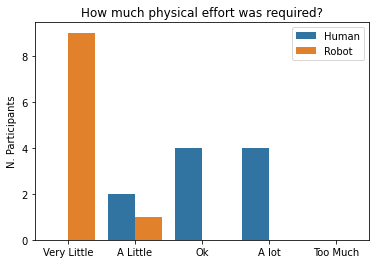

In [8]:
categories = ["Very Little", "A Little", "Ok", "A lot", "Too Much"]
title = "How much physical effort was required?"
plot_two_questions(df, first_variable="manual_needle1", first_name="Human", second_variable="needle1", second_name="Robot", categories = categories, title = title)

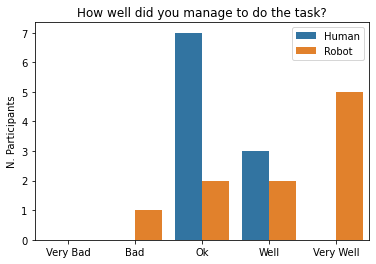

In [9]:
categories = ["Very Bad", "Bad", "Ok", "Well", "Very Well"]
title = "How well did you manage to do the task?"
plot_two_questions(df, first_variable="manual_needle2", first_name="Human", second_variable="needle2", second_name="Robot",  categories = categories, title = title)

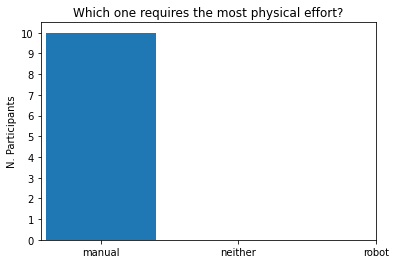

In [10]:
categories = ["manual", "neither", "robot"]
def which_requires_more_effort(value):
    if value > 0:
        return categories[0]
    elif value == 0:
        return categories[1]
    else:
        return categories[2]

df["more_effort"] = (df["manual_needle1"] - df["needle1"]).apply(which_requires_more_effort)

by_effort = df.groupby("more_effort")[["demog1"]].count().reset_index().rename(columns={"demog1": "count"})
plt.bar(by_effort["more_effort"], by_effort["count"])
plt.yticks(range(11))
plt.xticks(categories)
plt.ylabel("N. Participants")
plt.title("Which one requires the most physical effort?")
plt.show()

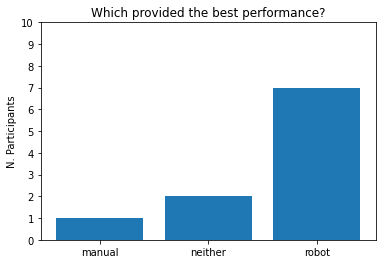

In [11]:
categories = ["manual", "neither", "robot"]
def which_requires_more_effort(value):
    if value > 0:
        return categories[0]
    elif value == 0:
        return categories[1]
    else:
        return categories[2]

df["effectivity"] = (df["manual_needle2"] - df["needle2"]).apply(which_requires_more_effort)
df["effectivity"] = pd.Categorical(df["effectivity"], categories)

by_effort = df.groupby("effectivity")[["demog1"]].count().reset_index().rename(columns={"demog1": "count"})
plt.bar(by_effort["effectivity"], by_effort["count"])
plt.yticks(range(11))
plt.xticks(categories)
plt.ylabel("N. Participants")
plt.title("Which provided the best performance?")
plt.show()

[]

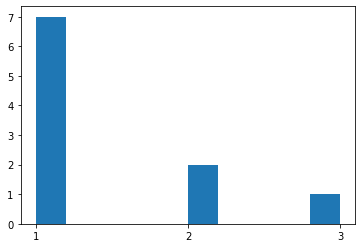

In [12]:
plt.hist(df["changing _instrument"])
plt.yticks(range(9))
plt.xticks(range(1,4))
plt.plot()

In [13]:
manual_needle[1:7]

NameError: name 'manual_needle' is not defined

In [14]:
time_task1 = pd.read_excel("Results.xlsx", sheet_name = "Time_experiment1.1")
time_task1 = time_task1.set_index("Unnamed: 0").T
time_task1 = pd.melt(time_task1, value_vars=time_task1.columns, var_name="category")
time_task1.head()


,category,value
0,manual,12
1,manual,11
2,manual,12
3,manual,15
4,manual,11


In [15]:
manual_value = []
robot_value = []

for index, row in time_task1.iterrows():
    if row["category"] == "manual":
        manual_value.append(row["value"])
    else:
        robot_value.append(row["value"])

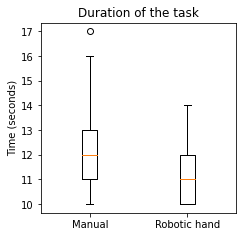

In [16]:
plt.figure(figsize=(3.5, 3.5))
plt.boxplot([manual_value, robot_value], labels=['Manual', 'Robotic hand'])

plt.title('Duration of the task')
plt.ylabel('Time (seconds)')
plt.show()

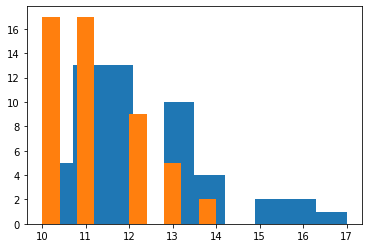

In [27]:
plt.hist(manual_value)
plt.hist(robot_value)
plt.show()

# Task 2

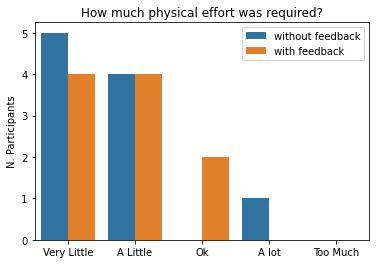

In [18]:
categories = ["Very Little", "A Little", "Ok", "A lot", "Too Much"]
title = "How much physical effort was required?"
plot_two_questions(df, first_variable="forceps2", first_name="without feedback", second_variable="forceps_feedback2", second_name="with feedback", categories = categories, title = title)


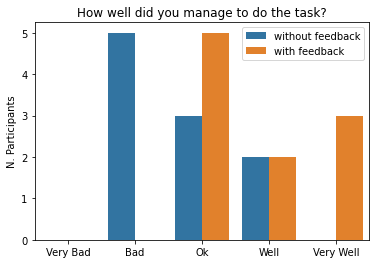

In [19]:
categories = ["Very Bad", "Bad", "Ok", "Well", "Very Well"]
title = "How well did you manage to do the task?"
plot_two_questions(df, first_variable="forceps3", first_name="without feedback", second_variable="forceps_feedback3", second_name="with feedback",  categories = categories, title = title)

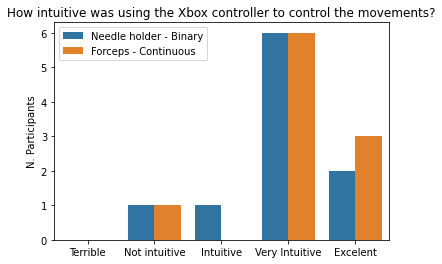

In [21]:
categories = ["Terrible", "Not intuitive", "Intuitive", "Very Intuitive", "Excelent"]
title = "How intuitive was using the Xbox controller to control the movements?"
plot_two_questions(df, first_variable="needle_xbox", first_name="Needle holder - Binary", second_variable="forceps_xbox", second_name="Forceps - Continuous",  categories = categories, title = title)

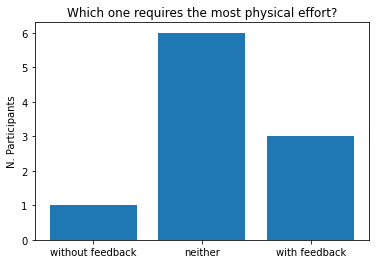

In [30]:
categories = ["without feedback", "neither", "with feedback"]
def which_requires_more_effort(value):
    if value > 0:
        return categories[0]
    elif value == 0:
        return categories[1]
    else:
        return categories[2]

df["more_effort"] = (df["forceps2"] - df["forceps_feedback2"]).apply(which_requires_more_effort)
df["more_effort"] = pd.Categorical(df["more_effort"], categories)

by_effort = df.groupby("more_effort")[["demog1"]].count().reset_index().rename(columns={"demog1": "count"})
plt.bar(by_effort["more_effort"], by_effort["count"])
plt.yticks(range(7))
plt.xticks(categories)
plt.ylabel("N. Participants")
plt.title("Which one requires the most physical effort?")
plt.show()

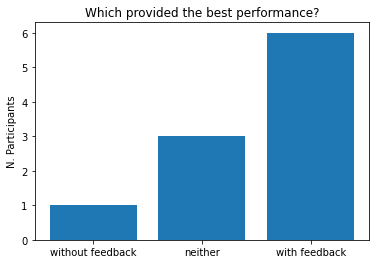

In [31]:
categories = ["without feedback", "neither", "with feedback"]
def which_requires_more_effort(value):
    if value > 0:
        return categories[0]
    elif value == 0:
        return categories[1]
    else:
        return categories[2]

df["effectivity"] = (df["forceps3"] - df["forceps_feedback3"]).apply(which_requires_more_effort)
df["effectivity"] = pd.Categorical(df["effectivity"], categories)

by_effort = df.groupby("effectivity")[["demog1"]].count().reset_index().rename(columns={"demog1": "count"})
plt.bar(by_effort["effectivity"], by_effort["count"])
plt.yticks(range(7))
plt.xticks(categories)
plt.ylabel("N. Participants")
plt.title("Which provided the best performance?")
plt.show()

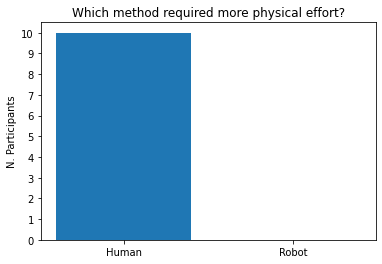

In [122]:
categories = ["Human", "Robot"]
plot_question(df, variable="comparison2", title="Which method required more physical effort?", categories = categories)

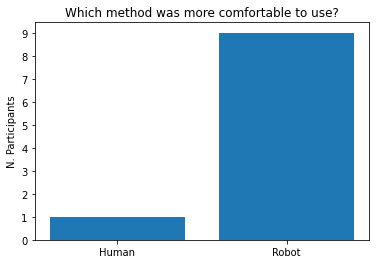

In [121]:
categories = ["Human", "Robot"]
plot_question(df, variable="comparison3", title="Which method was more comfortable to use?", categories = categories)

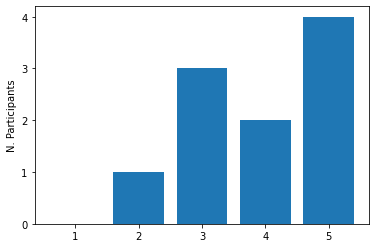

In [126]:
categories = ["1", "2", "3", "4", "5"]
plot_question(df, variable="forceps_feedback4.1", title="", categories = categories)

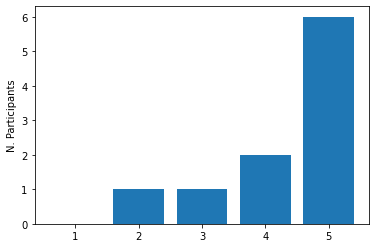

In [127]:
categories = ["1", "2", "3", "4", "5"]
plot_question(df, variable="forceps_feedback4.2", title="", categories = categories)

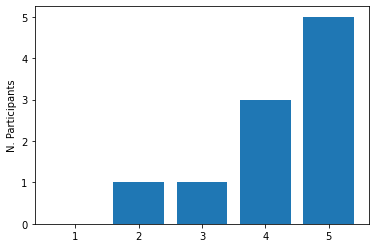

In [128]:
categories = ["1", "2", "3", "4", "5"]
plot_question(df, variable="forceps_feedback4.3", title="", categories = categories)